### Pixel importances with a parallel forest of trees [link](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html)


Import libraries and data

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt

Select number cores to perform parallel fitting of forest model
- (-1) selects all available cores

In [9]:
n_jobs = -1

Load dataset

In [4]:
data = fetch_olivetti_faces()
X, y = data.data, data.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/jaz/scikit_learn_data


Limit dataset to 5 classes:

In [8]:
mask = y < 5
X = X[mask]
y = y[mask]

To compute feature importance, fit a random forest classifier

In [28]:
forest = RandomForestClassifier(n_estimators=800, n_jobs=-1, random_state=42)
forest.fit(X, y)

RandomForestClassifier(n_estimators=800, n_jobs=-1, random_state=5)

Feature importance based on mean decrease in impurity (MDI)

Elapsed time to compute the importances: 0.126 seconds


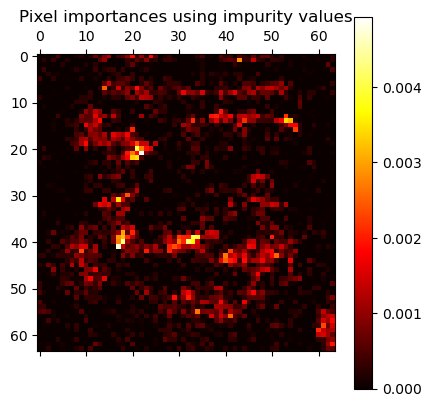

In [29]:
start_time = time.time()
img_shape = data.images[0].shape
importances = forest.feature_importances_
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()